In [1]:
import unitvelo as utv
import anndata
import scvelo as scv
import numpy as np
import os
import argparse
import time

(Running UniTVelo 0.2.5.2)
2023-04-30 17:28:43


In [2]:
root = "/scratch/blaauw_root/blaauw1/gyichen"
dataset = "IO_EU"
adata = anndata.read_h5ad(f"{root}/data/{dataset}_pp.h5ad")

In [3]:
# Hyperparameters
velo_config = utv.config.Configuration()
velo_config.GPU = 0

------> Manully Specified Parameters <------
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /home/gyichen/velovae/notebooks/UniTVelo.
Results will be stored in res folder
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Extracted 1000 highly variable genes.
Computing moments for 1000 genes with n_neighbors: 30 and n_pcs: 30
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)

# of velocity genes 244 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 232 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 2

Loss (Total): 4209.127, (Spliced): 2061.713, (Unspliced): 2147.414: 100%|█████████▉| 11998/12000 [04:45<00:00, 35.14it/s]  

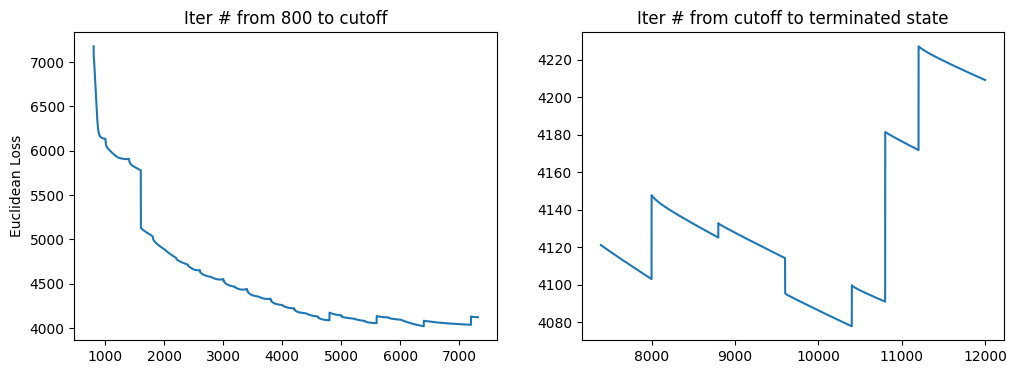

Loss (Total): 4209.127, (Spliced): 2061.713, (Unspliced): 2147.414: 100%|█████████▉| 11999/12000 [04:57<00:00, 40.33it/s]

Total loss 4077.784, vgene loss 4209.127


  0%|          | 0/3806 [00:00<?, ?cells/s]

Total run time: 306.39185070991516


In [4]:
t_start = time.time()
label = 'clusters'
adata = utv.run_model(adata, label, config_file=velo_config)
run_time = time.time() - t_start
print(f"Total run time: {run_time}")

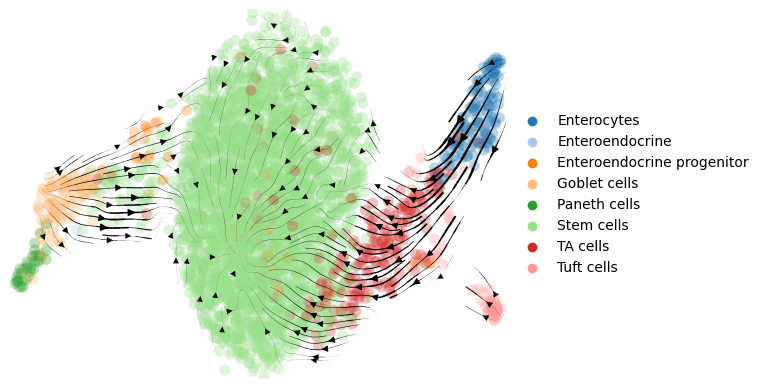

/scratch/blaauw_root/blaauw1/gyichen/utv_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


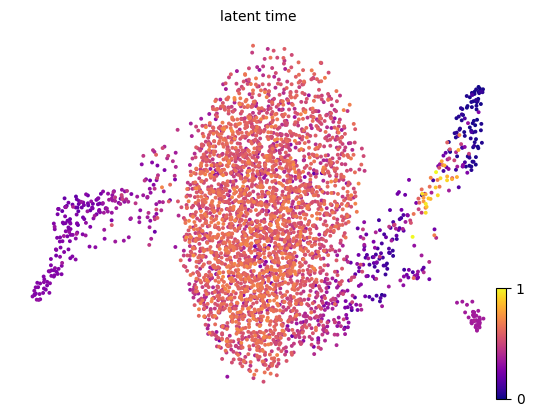

In [5]:
scv.pl.velocity_embedding_stream(adata,
                                 color=adata.uns['label'],
                                 title='',
                                 legend_loc='far right',
                                 dpi=100)
scv.tl.latent_time(adata, min_likelihood=None)
scv.pl.scatter(adata, color="latent_time", cmap="plasma")
adata.obs['utv_time'] = adata.obs['latent_time'].to_numpy()

adata.uns['utv_run_time'] = run_time
os.makedirs(f'{root}/data/utv/{dataset}_default')
adata.write_h5ad(f'{root}/data/utv/{dataset}_default/{dataset}.h5ad')